In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
def reader(sampler,error,max_n=1):
    path='/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun/MockResults/%s_%dpc'%(sampler,error)
    for i in range(1,max_n+1):
        datfile=np.load(path+'_%d.npz'%i)
        if i==1:
            all_n=datfile.f.n_stars
            percs1,percs2=[np.zeros([len(all_n),3]) for _ in range(2)]
            times=np.zeros(len(all_n))
        dat=datfile.f.Lambdas
        for j in range(len(all_n)):
            percs1[j,:]+=np.percentile(dat[j,:,0],[15.865,50.,84.135])
            percs2[j,:]+=np.percentile(dat[j,:,1],[15.865,50.,84.135])
        times+=datfile.f.runtimes
    percs1/=max_n
    percs2/=max_n
    times/=max_n
    return all_n,percs1,percs2,times
FS=16; true = [-2.3,-2.89]

In [165]:
dat=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun/MockResults/ErrADVI_10pc_1.npz')

(array([4965., 1834.,  916.,  570.,  337.,  245.,  194.,  158.,  115.,
          88.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 10 Patch objects>)

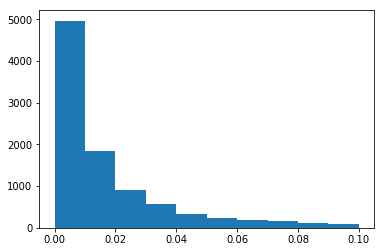

In [170]:
plt.hist(dat['Errors'][0][:,0],range=[0,0.1])

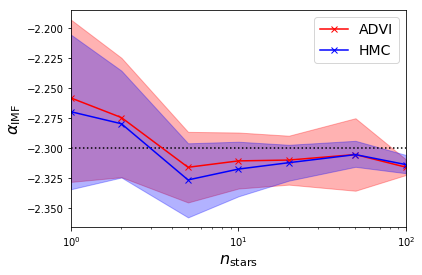

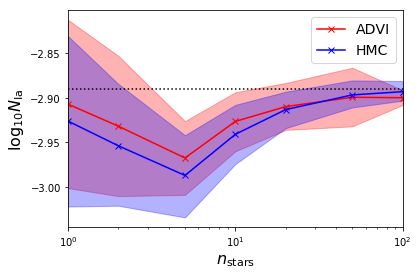

In [200]:
for error in [5]:#,10]:
    ad=reader('ADVI',error)
    hmc=reader('HMC',error)
    labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
    for ind in [0,1]:
        plt.figure()
        plt.fill_between(ad[0],ad[ind+1][:,0],ad[ind+1][:,2],alpha=0.3,color='r')
        plt.errorbar(ad[0],ad[ind+1][:,1],marker='x',label='ADVI',c='r');
        plt.hlines(true[ind],min(ad[0]),max(ad[0]),linestyles=':')
        plt.fill_between(hmc[0],hmc[ind+1][:,0],hmc[ind+1][:,2],alpha=0.3,color='b')
        plt.errorbar(hmc[0],hmc[ind+1][:,1],marker='x',label='HMC',c='b')    
        plt.legend(fontsize=FS-2,loc='upper right')
        plt.ylabel(labels[ind],fontsize=FS)
        plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS)
        plt.xlim([min(ad[0]),max(ad[0])])
        plt.xscale('log');
        #plt.savefig('../../Plots/%dpc_MockComparison_%d.pdf'%(error,ind),bbox_inches='tight')#plt.title('Mock Data with %d%% Error'%error)

(0.9, 110.00000000000001)

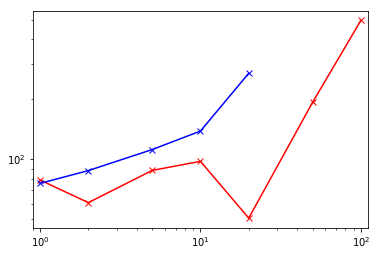

In [199]:
ad=reader('ADVI',1)
hmc=reader('HMC',1)
plt.errorbar(ad[0],ad[3],label='1% ADVI',marker='x',c='r')
plt.errorbar(hmc[0],hmc[3],label='1% HMC',marker='x',c='b')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])

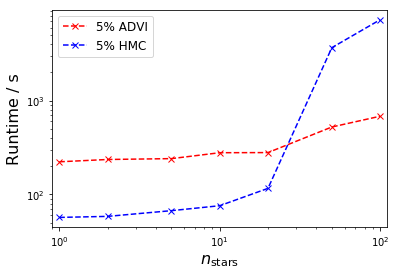

In [201]:
ad=reader('ADVI',5,max_n=3)
hmc=reader('HMC',5)
plt.errorbar(ad[0],ad[3],label='5% ADVI',marker='x',c='r',ls='--')
plt.errorbar(hmc[0],hmc[3],label='5% HMC',marker='x',c='b',ls='--')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])
plt.legend(fontsize=FS-4,loc='upper left');plt.ylabel('Runtime / s',fontsize=FS);
plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS);
plt.savefig('../../Plots/MockRuntimeComparison')